<a href="https://colab.research.google.com/github/timou0911/ML-DL-Learning/blob/main/MNIST_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[Tutorial Following](https://www.youtube.com/watch?v=vBlO87ZAiiw)

In [32]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [54]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Batch_size = 100
LR = 0.001
EPOCHES = 10
print(DEVICE)

cpu


In [55]:
trannsform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))
])

In [56]:
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=trannsform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=trannsform)

train_loader = DataLoader(train_set, batch_size=Batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=Batch_size, shuffle=True)

print(train_set)
print(test_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])


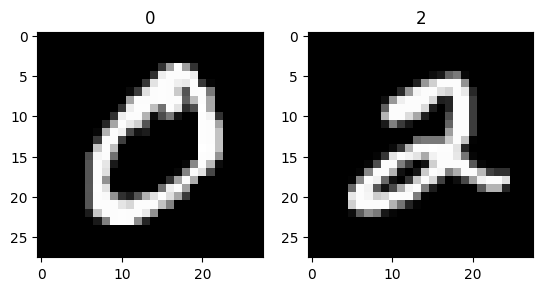

In [57]:
print(train_set.train_data.size())
plt.subplot(1, 2, 1)
plt.imshow(train_set.train_data[1].numpy(), cmap='gray')
plt.title(f'{train_set.train_labels[1]}')
plt.subplot(1, 2, 2)
plt.imshow(train_set.train_data[5].numpy(), cmap='gray')
plt.title(f'{train_set.train_labels[5]}')
plt.show()

In [66]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    out = F.softmax(x)

    return out

In [67]:
model = CNN().to(DEVICE)
print(model)
optimizer = optim.Adam(model.parameters(), lr=LR)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [68]:
def train(epoch):
  model.train()

  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(DEVICE), target.to(DEVICE)
    optimizer.zero_grad()
    output = model(data)

    criterion = nn.CrossEntropyLoss()
    loss = criterion(output, target)

    loss.backward()
    optimizer.step()

    if (batch_idx) % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(DEVICE), target.to(DEVICE)
      output = model(data)

      criterion = nn.CrossEntropyLoss()
      test_loss += criterion(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Correct: {correct}, Total: {len(test_loader.dataset)}, Accuracy: {100. * correct / len(test_loader.dataset):.3f}%\n')

def show_model_params(model):
    for name,parameters in model.named_parameters():
        print(name,':',parameters.size())
show_model_params(model)

conv1.weight : torch.Size([10, 1, 5, 5])
conv1.bias : torch.Size([10])
conv2.weight : torch.Size([20, 10, 5, 5])
conv2.bias : torch.Size([20])
fc1.weight : torch.Size([50, 320])
fc1.bias : torch.Size([50])
fc2.weight : torch.Size([10, 50])
fc2.bias : torch.Size([10])


In [69]:
for epoch in range(1, EPOCHES+1):
    train(epoch)
    test()

<ipython-input-66-4cf3c264966a>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(x)


Train Epoch: 1 [0/60000] Loss: 2.303228
Train Epoch: 1 [2000/60000] Loss: 2.286807
Train Epoch: 1 [4000/60000] Loss: 2.169188
Train Epoch: 1 [6000/60000] Loss: 2.008614
Train Epoch: 1 [8000/60000] Loss: 1.924168
Train Epoch: 1 [10000/60000] Loss: 1.799289
Train Epoch: 1 [12000/60000] Loss: 1.847059
Train Epoch: 1 [14000/60000] Loss: 1.863413
Train Epoch: 1 [16000/60000] Loss: 1.736198
Train Epoch: 1 [18000/60000] Loss: 1.773885
Train Epoch: 1 [20000/60000] Loss: 1.786215
Train Epoch: 1 [22000/60000] Loss: 1.682561
Train Epoch: 1 [24000/60000] Loss: 1.793355
Train Epoch: 1 [26000/60000] Loss: 1.662872
Train Epoch: 1 [28000/60000] Loss: 1.674138
Train Epoch: 1 [30000/60000] Loss: 1.643745
Train Epoch: 1 [32000/60000] Loss: 1.629686
Train Epoch: 1 [34000/60000] Loss: 1.630488
Train Epoch: 1 [36000/60000] Loss: 1.721272
Train Epoch: 1 [38000/60000] Loss: 1.660743
Train Epoch: 1 [40000/60000] Loss: 1.688154
Train Epoch: 1 [42000/60000] Loss: 1.621280
Train Epoch: 1 [44000/60000] Loss: 1.642

<ipython-input-66-4cf3c264966a>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(x)


Prediction: 7


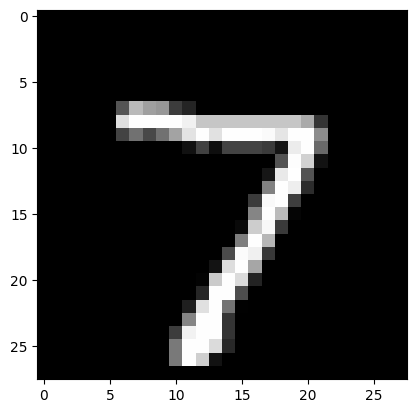

In [70]:
model.eval()
data, target = test_set[0]
data = data.unsqueeze(0).to(DEVICE)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()